---
title: "Intro to Convolution Neural Networks"
author: Deepam Minda
date: "July 30, 2024"
categories: [cnns, deep-learning]
format:
  html:
    toc: true
    toc-depth: 3
    # html-math-method: katex
    # css: ../../styles.css
    code-fold: false
  ipynb: default
  # markdown: default
execute:
  warning: false
---

Welcome to the land of vision in deep learning. Gone are the days you need to look at 10 types of thresholding and 20 types of data pre-processing and apply a logistic classifier on the outputs of a cnn feature extractor. These days you can just load a pretrained model and watch a decaying training and validation loss and feel good about yourself.

Turns out, this doesnt last long though. You eventually get around to understand what these models actually are because you need to! 
And when it comes to vision, you surely cannot leave out CNNs. Sure its all transformers nowadays but CNNs or convolutional neural networks were essentially the first deep learning models to make a significant impact in the field of computer vision and most would agree started the whole deep learning wave in the modern era. AlexNet, VGG, resnets would be considered the pioneer models in this field.

Now you might ask: All this sounds interesting Deepam, but what the hell is a convolution? Let us understand convolutions and build a simple CNN model from scratch. 

The pre-requisites for this post are:

- Basic understanding of python and numpy.
- Basic understanding of neural networks and feed forward networks.


## Convolutions

Convolutions is just an operation between 2 signals (vectors/matrices/continuous-signals) that returns a 3rd signal. It represents how one signal modifies the other signal. In general terms, convolution is used to apply a filter to a signal or data. (We'll understand convolution for discrete signals)


### Steps in Convolution

Let's consider two signals: the input signal $(f)$ and the kernel/filter $(g)$.

Convolution involves the following steps:

1. **Prepare the Kernel**: Flip the kernel $(g)$ both horizontally and vertically. This step ensures the operation is commutative and maintains time-reversal properties. [More details](https://dsp.stackexchange.com/questions/5992/flipping-the-impulse-response-in-convolution/6355#6355)

2. **Align and Slide**: Position the flipped kernel at the start of the input signal $(f)$. Then, systematically slide it across the entire length of $(f)$.

3. **Multiply**: At each position, perform element-wise multiplication between the overlapping portions of the flipped kernel and the input signal.

4. **Sum**: Add up all the products from step 3 to get a single value. This value represents the convolution result at the current position.

5. **Record and Repeat**: Store the sum as an element in the output signal, then move the kernel to the next position and repeat steps 3-5 until the entire input signal has been covered.

The resulting output signal represents how the kernel has "filtered" or modified the input signal, highlighting certain features or patterns based on the kernel's characteristics.

This process can be extended to 2D (for images) or higher dimensions, where the kernel slides over the input in all dimensions.

For a 1d array this might look like this: 

In [61]:
import numpy as np 

f = np.array([1,2,3,-1, 10, -4])
g = np.array([1,0,-1])
inverted_g = g[::-1]  # {-1 0 1}

print(f"f: {f}")
print(f"g: {g}")
print(f"inverted_g: {inverted_g}")

window_size = g.shape[0]
result = []

print("\nSteps in convolution, slide inverted g (say g`) over f in a loop: \n")
for idx, i in enumerate(range(len(f)-window_size+1)):
    slice_of_f = f[i:i+window_size]
    print(f"step {idx+1}.1 element wise multiplication of f[{i}:{i+window_size}] and g`: {slice_of_f} * {inverted_g} = {slice_of_f * inverted_g}")
    print(f"step {idx+1}.2 sum({slice_of_f * inverted_g}) = {np.sum(slice_of_f * inverted_g)}")
    result.append(np.sum(slice_of_f * inverted_g))
    print(f"result: {[result[j] for j in range(len(result))]}\n")

print(f"\nfinal result of (f*g): {result}")

f: [ 1  2  3 -1 10 -4]
g: [ 1  0 -1]
inverted_g: [-1  0  1]

Steps in convolution, slide inverted g (say g`) over f in a loop: 

step 1.1 element wise multiplication of f[0:3] and g`: [1 2 3] * [-1  0  1] = [-1  0  3]
step 1.2 sum([-1  0  3]) = 2
result: [2]

step 2.1 element wise multiplication of f[1:4] and g`: [ 2  3 -1] * [-1  0  1] = [-2  0 -1]
step 2.2 sum([-2  0 -1]) = -3
result: [2, -3]

step 3.1 element wise multiplication of f[2:5] and g`: [ 3 -1 10] * [-1  0  1] = [-3  0 10]
step 3.2 sum([-3  0 10]) = 7
result: [2, -3, 7]

step 4.1 element wise multiplication of f[3:6] and g`: [-1 10 -4] * [-1  0  1] = [ 1  0 -4]
step 4.2 sum([ 1  0 -4]) = -3
result: [2, -3, 7, -3]


final result of (f*g): [2, -3, 7, -3]


We also have a few types of convolutions, based on how much padding is added to the input signal:

1. **Valid Convolution**: 
    - The output is smaller than the input. No padding is applied.
    - Output length = length(f) - length(g) + 1 = 5 - 3 + 1 = 3

2. **Same Convolution**: 
    - Padding is applied to keep the output size the same as the input. 
    - We add 1 zero on each side of the input: [0, 1, 2, 3, 4, 5, 0]. 
    - Output length = length(f) = 5

3. **Full Convolution**: 
    - Maximum padding is applied. 
    - Output length = length(f) + length(g) - 1 = 5 + 3 - 1 = 7. 
    - Here, we add 2 zeros on each side of the input: [0, 0, 1, 2, 3, 4, 5, 0, 0]  
    (num of zeros=length(g)-1)

In [74]:
f = np.array([1, 2, 3, 4, 5] )
g = np.array([1,0,-1,3])

print(f"Valid Convolution: {np.convolve(f, g, mode='valid')}")
print(f"Same Convolution: {np.convolve(f, g, mode='same')}")
print(f"Full Convolution: {np.convolve(f, g, mode='full')}")

Valid Convolution: [5 8]
Same Convolution: [2 2 5 8 5]
Full Convolution: [ 1  2  2  5  8  5  7 15]


That wasnt so hard was it? The concept of convolution seems simple enough. Slide one signal over another and each time, do element wise multiplication and summation to get a value. 

Lets look at an example for 2d arrays.  

Lets take 2 matrices $f$ & $g$ of shapes (5,5) and (3,3). First we need to flip the $g$ both horizontally and vertically. Then, for each $g$ sized block in $f$, we do element-wise multiplication then summation. This gives us a resulting (3,3) matrix (valid-convolution). 

Lets see how this works.

In [89]:
#| code-fold: true
f = np.random.rand(5,5)
g = np.array([[1,0,-1],[2,0,-2],[3,0,-3]])
inverted_g = g[::-1, ::-1]
print(f"(f): \n{f}\n")
print(f"(g): \n{g}\n")
print(f"inverted g, ie (g`): \n{inverted_g}\n")


(f): 
[[0.23919993 0.26375948 0.29688748 0.11150198 0.18742085]
 [0.03906332 0.84585776 0.93079439 0.71811113 0.0409505 ]
 [0.70677725 0.5303402  0.6267753  0.3776878  0.85878914]
 [0.55914983 0.44782982 0.05075409 0.67132382 0.70423151]
 [0.19054968 0.44657225 0.66843129 0.01343633 0.55834927]]

(g): 
[[ 1  0 -1]
 [ 2  0 -2]
 [ 3  0 -3]]

inverted g, ie (g`): 
[[-3  0  3]
 [-2  0  2]
 [-1  0  1]]



In [90]:
#| code-fold: true
f_rows, f_columns = f.shape 
g_rows, g_columns = g.shape

result = np.zeros((f_rows-g_rows+1, f_columns-g_columns+1))
print(f"Convolution steps:")
for i in range(f_rows-g_rows+1):
    for j in range(f_columns-g_columns+1):
        item = f[i:i+g_rows, j:j+g_columns] * inverted_g
        if i<3 and j==0:
            print(f"step {i+j+1}\n->sum(f[{i}:{i+g_rows}, {j}:{j+g_columns}] * g`): \n{item}")
            print(f"result[{i},{j}] -> {np.sum(item):.4f}\n")
        result[i,j] = np.sum(item)
print("... and so on.\n")
print(f"final result: \n{result}\n")


Convolution steps:
step 1
->sum(f[0:3, 0:3] * g`): 
[[-0.7175998   0.          0.89066245]
 [-0.07812665  0.          1.86158878]
 [-0.70677725  0.          0.6267753 ]]
result[0,0] -> 1.8765

step 2
->sum(f[1:4, 0:3] * g`): 
[[-0.11718997  0.          2.79238318]
 [-1.4135545   0.          1.25355059]
 [-0.55914983  0.          0.05075409]]
result[1,0] -> 2.0068

step 3
->sum(f[2:5, 0:3] * g`): 
[[-2.12033176  0.          1.88032589]
 [-1.11829965  0.          0.10150818]
 [-0.19054968  0.          0.66843129]]
result[2,0] -> -0.7789

... and so on.

final result: 
[[ 1.87652283 -0.86491817 -1.87607385]
 [ 2.00679355 -0.46505069 -1.55202658]
 [-0.77891572 -0.44410511  1.89291435]]



## Neural networks

Now that we clearly understand what a convolution is, lets get back to neural networks. Suppose you wanted to classify images before CNNs were developed. How would you do it? In most cases, you would use some pre-determined filters to extract features from the images and then use a fully connected network to classify the images. Those features could be:

1. Edge filters: Used to detect edges in images. Common edge detection filters include:
   - Sobel filter: Emphasizes horizontal or vertical edges
   - Prewitt filter: Similar to Sobel, but with different coefficients
   - Laplacian filter: Detects edges in all directions

2. Texture filters: Used to capture texture information:
   - Gabor filters: Detect specific frequencies and orientations
   - Laws' texture energy measures: A set of filters for texture analysis

3. Color histograms: Represent the distribution of colors in an image

4. SIFT (Scale-Invariant Feature Transform): Detects and describes local features in images

5. HOG (Histogram of Oriented Gradients): Counts occurrences of gradient orientations in localized portions of an image

6. Haar-like features: Used in face detection, these features look at rectangular regions and sum up pixel intensities

After applying these filters, you would typically:

1. Extract the resulting features
2. Possibly apply dimensionality reduction techniques like PCA
3. Feed the processed features into a classifier such as SVM, Random Forest, or a simple neural network

This approach, while effective for certain tasks, had limitations:
- Handcrafted features might not capture all relevant information
- The process was often computationally expensive
- Feature engineering required domain expertise

CNNs addressed these issues by learning the filters automatically during training, leading to more effective and adaptable vision models.

## Convolutional neural networks (CNNs/Convnets)

We now understand why handcrafted fatures are hard to come up with. Lets back up for a second and remember our old friends feed forward (FF) networks. What is the problem with using feed forward networks to process images? Specifically why dont we just give the FF network the raw pixels and let it learn?

As it turns out, there are quite a few things:

Suppose we have a (224,224,3) sized input-image. Thats a total of 150528 data-points. suppose i want to have a output vector of length 1000 (classifier with 1k classes), this gives me a total of roughly 150k * 1k = 150 million parameters, where we have 1k parameters for each input pixel! That is a LOTT of parameters. 

So how can we use the inherent nature of images and image-data to construct better models? We also learned convolutions in the previous section. Maybe that gives you some hint?

Pixel data is inherently very locally dependent. This is very different from tabular data, for example, a housing price dataset where each feature is largely independent of each other. By design feedforward networks do not allow for this kind of information to be shared between different data points in the network. This is beacause for each linear layer, a output shaped weight matrix is learned for each point in the input. This seems very inefficient. 

What if instead of treating each individual pixel as a different input, we treat a patch of pixels as a single input? This means we get one output for a patch of pixels. This is done via convolution. We can learn a lot of small filters that will interact with our image and get us some useful features which can then be fed to a FF network. 

This is exactly what a convolutional layer does. It consists of a set of learnable filters that slide over the input image and compute the output. If the input image is of size $(H_{in}, W_{in}, C_{in})$, and we have $C_{out}$ filters of size $(k,k,C_{in})$, the output of the convolutional layer is of size $(H_{out}, W_{out}, C_{out})$. 
Each filter slides over the entire input volume and produces a 2d matrix of size $(H_{out}, W_{out})$. And this is done for all the filters in the layer. So the output of the convolutional layer is a 3d tensor of size $(H_{out}, W_{out}, C_{out})$.

Note that the filters will always have depth equal to the input volume's depth.

The number of parameters learned here would be $(k*k*C_{in}*C_{out})$. So for a conv layer with 64 filters of size (3x3) for an input image of size (224x224x3), we would have 1792 parameters, ehich is orders of magnitutde smaller already. Much more efficient isn't it?

<!-- 
1. Feed forward networks do not share information between different data points in the network. For example if X = [0,1,2,3] is a vector of input to the network, all the interactions between weights happen independently for each data point in one sample of data.
This works fine for tabular features of some data, because they actually are not dependent on their spatial postion wrt each other. The model will learn the same if you shuffle all columns of a dataset. <br><br>But images pixels are a different type of data. They are inherently very locally dependent. If you look at a single pixel, it is very likely to be highly correlated with its neighboring pixels. Hence our network should process atleast patches of images at a time. 

2. Earlier when classical image processing methods were being used, many a times hand-made "filters" were used to extract features from images. In CNNs, we learn these filters! and we learn a lot of them. So think of each layer in this CNN as having a lot of these filters which are learned during network. We'll soon visualize what concepts they learn.

3. Another concept that helps is parameter sharing. We could in thoery have different set of filters for different patches in the image, but this would shoot up the parameter count of our model. So in a single layer, we use a single set of filters for all patches in the image. -->


In [54]:
import torchinfo 
import torch.nn as nn

model = nn.Linear(150528, 1000)
print(torchinfo.summary(model, input_size=(1, 150528)))

model = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
print(torchinfo.summary(model, input_size=(1, 3, 224, 224)))

Layer (type:depth-idx)                   Output Shape              Param #
Linear                                   [1, 1000]                 150,529,000
Total params: 150,529,000
Trainable params: 150,529,000
Non-trainable params: 0
Total mult-adds (M): 150.53
Input size (MB): 0.60
Forward/backward pass size (MB): 0.01
Params size (MB): 602.12
Estimated Total Size (MB): 602.73
Layer (type:depth-idx)                   Output Shape              Param #
Conv2d                                   [1, 64, 224, 224]         1,792
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
Total mult-adds (M): 89.92
Input size (MB): 0.60
Forward/backward pass size (MB): 25.69
Params size (MB): 0.01
Estimated Total Size (MB): 26.30


Let us visualize the shapes of the input and output of a convolutional layer. (ignoring batch dimension for simplicity)

Images are typically represented as 3D tensors: $(H_{in}, W_{in}, C_{in})$

Think of this as a stack of 2D images, where:
- $H_{in}$ is the height
- $W_{in}$ is the width
- $C_{in}$ is the number of channels (e.g., 3 for RGB)

Now, let's break down the convolution operation:

1. The Filter (or Kernel)
   - We have $C_{out}$ filters, each of size $(k, k, C_{in})$
   - Each filter slides across the entire input image

2. The Sliding Window
   - Imagine a window of size $(k, k)$ moving across the image
   - At each position, we perform a dot product between the filter and the image patch

3. The Output
   - For each filter, we get a 2D output $(H_{out}, W_{out})$
   - Stacking these for all $C_{out}$ filters gives us $(H_{out}, W_{out}, C_{out})$

Key Parameters:
- Stride ($S$): How many pixels we move the filter each step, if stride is 1, the filter moves 1 pixel inat a time. Doubling the stride will reduce output size by half.
- Padding ($P$): Extra zeros added around the input image edges. Image can be padded with other values too. padding is done on both sides of the height and width dimensions.

Output Size Formula:

- $H_{out} = (H_{in} - k + 2P) / S + 1$
- $W_{out} = (W_{in} - k + 2P) / S + 1$

Intuition:
- Larger stride → Smaller output (we're skipping pixels)
- More padding → Larger output (we're adding extra space to convolve over) (as we saw in different types of convolution)


Summarising, 

- input: $(H_{in}, W_{in}, C_{in})$
- conv_layer params:
    - filter: $(k, k, C_{in})$
    - num_filters: $C_{out}$
    - stride: $S$
    - padding: $P$

- output: $(H_{out}, W_{out}, C_{out})$, where 
   - $H_{out} = (H_{in} - k + 2P) / S + 1$
   - $W_{out} = (W_{in} - k + 2P) / S + 1$

For a visual understanding of how all these parameters interact, check out this [convolution visualizer](https://ezyang.github.io/convolution-visualizer/).

## Other layers

Conolutional layers are usually followed by activation functions like ReLU and then a pooling layer.

### Pooling layer
Pooling layer? Yes, pooling layer. 
Given a volume of input, instead of using filters, we can use non-parameterized operations like min and max to downsample the data and get a smaller volume. That's what pooling does. It reduces the H and W dimensions of the input volume, keeping the depth the same. But why would we do something like that? Two main reasons:

1. Reduce the number of parameters: By reducing the number of parameters, the model can learn more general features.
2. Reduce the amount of overfitting: By reducing the amount of overfitting, the model can learn more robust features.

The entire operation is the same as the convolutional layer except instead of convolving $f$ with a filter $g$ of size $(k,k, C_{in})$, we take the max/mean of $f$ for each patch of size $(k,k, C_{in})$.

Let's look at an example of max pooling, which is the most common type of pooling:

In [81]:
# Input feature map
input = np.array([
[1, 3, 2, 1],
[5, 6, 4, 2],
[7, 8, 9, 4],
[1, 2, 3, 5]
])

# Max pooling with 2x2 filter and stride 2
def max_pool_2x2(input):
    height, width = input.shape
    output_height, output_width = height // 2, width // 2
    output = np.zeros((output_height, output_width))
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.max(input[2*i:2*i+2, 2*j:2*j+2])
    return output

result = max_pool_2x2(input)
print("Input:")
print(input)
print("\nAfter 2x2 Max Pooling:")
print(f"""Result: 
[[ max(f[0:2, 0:2]) max(f[0:2, 2:4])]
 [ max(f[2:4, 0:2]) max(f[2:4, 2:4])]]
""")
print(result)

Input:
[[1 3 2 1]
 [5 6 4 2]
 [7 8 9 4]
 [1 2 3 5]]

After 2x2 Max Pooling:
Result: 
[[ max(f[0:2, 0:2]) max(f[0:2, 2:4])]
 [ max(f[2:4, 0:2]) max(f[2:4, 2:4])]]

[[6. 4.]
 [8. 9.]]


As you can see, max pooling takes the maximum value in each 2x2 region, effectively reducing the spatial dimensions of the feature map while retaining the most prominent features.

### Activation layer

Activations used are sigmoid, ReLu, and tanh. Since VGGs and deeper networks use ReLu, it is common to see ReLu used in CNNs. This is because ReLu partially solves the vanishing gradient problem, which is a common problem in deep networks. Read more about this [here](https://stats.stackexchange.com/a/240491). 

But what the ReLU layer does is very simple, it applies max(0, x) to each element in the input. Effectively, it zeros out negative values, and leaves positive values unchanged.


## Other jargon

Before we dive into training a model, let's review some important jargon related to CNNs:

- filters: also called kernels. they are learnable parameters in a convolutional layer. Each filter is a small matrix (usually 3x3 or 5x5) that slides over the input image to detect specific features. The values in these filters are updated during training to learn important features for the task at hand.
- activation maps: the output when a \[Conv->Relu\] filter interacts with entire image.
- feature maps: the output of a convolutional layer. (before the activation)
- depth: refers to the number of channels.
- receptive field: the area of the input that a given filter is able to see at a time is called the receptive field.

## A Simple CNN architecture

Lets assume a simple task of image classification. The most common form of a CNN architecture stacks a few CONV-RELU layers, follows them with POOL layers, and repeats this pattern until the image volume has reduced to a small size. At some point, it is common to transition to fully-connected layers. The last fully-connected layer holds the output, such as the class scores. In other words, the most common ConvNet architectures follow the pattern:

`INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC`

here FC: feed-forward layer. 

Note that since architectures like [Resnet](https://arxiv.org/pdf/1512.03385) and [Inception](https://arxiv.org/pdf/1409.4842) emerged, this is not the case, and the CNNs feature more intricate and different connectivity structures.

## CNN characteristics

While we are here, let us also take note of some characteristics of CNNs:

* **Sparse connectivity**: CNNs focus on local patterns in data, particularly useful for spatial data like images. A single patch in feature map is connected to only a small patch of image (in MLPs there is dense/full connection).
* **Parameter sharing**: the same kernel/filter slides across the image. ie different neurons in each activation map is calculated using the same filter. In MLPs each neuron in the output space is calculated using different weight values.  this makes it efficient for computation.
* **Spatial hierarchy**: CNNs build a hierarchy of increasingly abstract features. Lower layers detect simple features (e.g., edges), while deeper layers combine these to detect more complex patterns.
* **Translation invariance**: CNNs can recognize patterns regardless of their position in the input. This is because we are using filters that slide over patches of data, so information is processed in the same way for different patches of data This is crucial for tasks like object recognition in images.


![visualizing activation maps in cnns. From the paper 'Visualizing and Understanding Convolutional Networks'](visualizing-activation-maps-cnns.png){#fig-cnn-activation-maps height=90%, width=90%}

Have a look at [this](https://arxiv.org/pdf/1311.2901) wonderful paper that dives deep into visualizing and understanding Cnns.

## Lets train a model yaar

I'd be remiss if I let you finish here thinking that you got CNNs down. Just for old times sake, lets train a model to classify images from the fashion mnist dataset. The dataset contains very small grayscale (ie single channel) images of size (28*28). 

> the below code is all generated by claude-sonnet-3.5, bcuz its kinda boring to train a toy model on a toy dataset, that too for classification. dont worry though, ill soon be back with a more interesting vision problem to get our hands dirty.

Training itself is pretty straightforward. We split the data into train-test, and then train the model for a few epochs. We use the Adam optimizer and CrossEntropyLoss as the loss function. The outputs of the model are bare logits, which the loss functions accepts with targets. A learning rate of 0.001 is used for the optimizer. 
In the end we test on the test set, and print the accuracy. 

device: mps
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 32, 7, 7]          18,464
         MaxPool2d-6             [-1, 32, 3, 3]               0
            Linear-7                  [-1, 128]          36,992
            Linear-8                   [-1, 10]           1,290
Total params: 75,562
Trainable params: 75,562
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.37
Params size (MB): 0.29
Estimated Total Size (MB): 0.67
----------------------------------------------------------------
Epoch [1/5], Loss: 0.5107
Epoch 

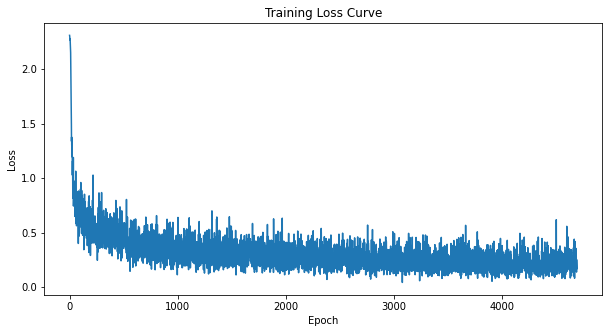

Test Accuracy: 90.38%


In [22]:
#| code-fold: false
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)     # input channels in layer1 is equal to number of input channels in the input image
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 32 * 3 * 3)     # flattening the tensor to feed it to FC layer
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_built() else "cpu")
print(f"device: {device}")

# Load and preprocess the Fashion MNIST dataset (just plain old standardization)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleCNN()

# Visualize model summary
summary(model, (1, 28, 28), device="cpu")

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
all_losses = []
for epoch in range(num_epochs):
    model.train()
    epoch_losses = []
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {np.mean(epoch_losses):.4f}")
    all_losses.extend(epoch_losses)

# plot train loss curve
plt.figure(figsize=(10, 5))
plt.plot(all_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Neat!! 
Now let's visualize some of the predictions.

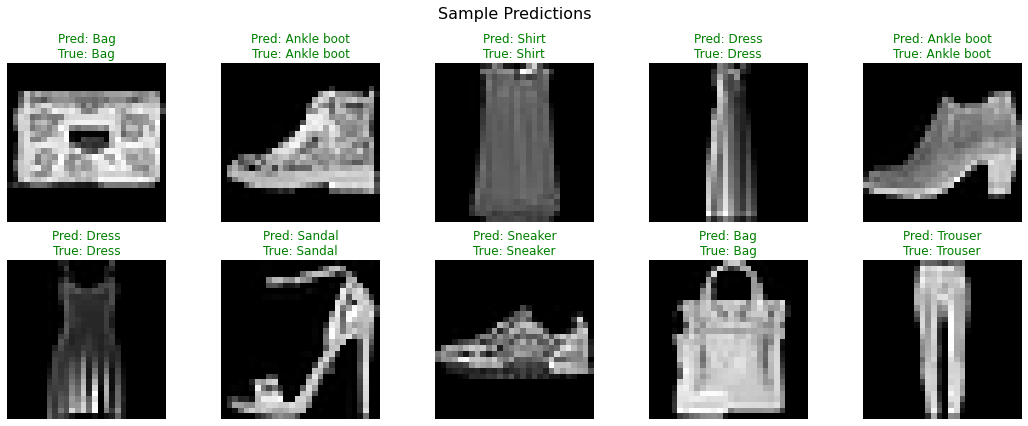

In [26]:
#| code-fold: false

import random

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']   # verify using train_dataset.classes

model.eval()
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Predictions', fontsize=16)

with torch.no_grad():
    for i, idx in enumerate(random.sample(range(len(test_dataset)), 10)):
        image, label = test_dataset[idx]
        output = model(image.unsqueeze(0).to(device))
        predicted = output.argmax(1).item()
        
        ax = axes[i // 5, i % 5]
        ax.imshow(image.squeeze(), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Pred: {class_names[predicted]}\nTrue: {class_names[label]}', 
                     color='green' if predicted == label else 'red')

plt.tight_layout()
plt.show()

Now let us visualize the confisuion matrix to exactly see how the model is doing.

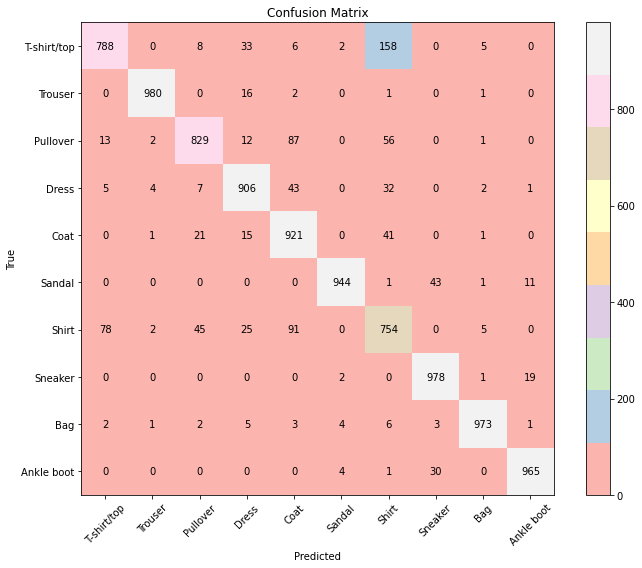

In [30]:
# see the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Collect predictions and true labels
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(targets.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Create and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap="Pastel1")
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('True')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")

plt.tight_layout()
plt.show()

We can see that the model is particularly confused in the "Tshirt" & "Shirt" class (less than 70% accuracy) and most confident in "Trouser", "Sneaker", "Bag" and "Ankle boot" (greater than 95% accuracy)


## Concluding

I hope you clearly understand the core CNN fundamental architecture. This is just the base that'll act as a foundation for more interesting architectures as we go on. Until then, see you in the next one!

Byeee :)

## References and Further Reading

- sebastian raschka course material [here](https://sebastianraschka.com/blog/2021/dl-course.html#l13-introduction-to-convolutional-neural-networks)
- CS231N Cnn notes [here](https://cs231n.github.io/convolutional-networks/#case). Great intuition and more detail about the shapes, local connectivity, spatial arrangement, and loads of other stuff.
- beginner friendly article on Medium (its a great blog-series for ML) [here](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721)
- Visualizing and Understanding Convolutional Networks. 2014 paper [here](https://arxiv.org/pdf/1311.2901)
- Find out some of the modifications made on this basic architecture. This is recommended further reading. [here](https://towardsdatascience.com/10-papers-you-should-read-to-understand-image-classification-in-the-deep-learning-era-4b9d792f45a7)